# Изучение закономерностей, определяющих успешность игр
## Описание проекта:
  Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года. Наша задача - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

### 2 шаг

In [5]:
# переименовываем столбцы
df = df.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'})

In [6]:
# проверяем
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
# проверяем пропуски в столбцах
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
# проверяем на дубликаты
df.duplicated().sum()

0

In [9]:
# заменим пропуски в столбце 'year_of_release' на значение 0. В дальнейших исследованиях будем откидывать данное значение, применяя фильтрацию
df['year_of_release'] = df['year_of_release'].fillna(0)
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,    0., 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [10]:
# меняем тип данных
df['year_of_release'] = df['year_of_release'].astype('int')

In [11]:
#найдем медианное значение столбца 'critic_score'
isna_critic = df.groupby('genre')['critic_score'].median()


In [12]:
isna_critic = pd.DataFrame({'isna_critic': isna_critic}).reset_index() # создаем таблицу с данными и проверяем результат
isna_critic

,genre,isna_critic
0,Action,68.0
1,Adventure,66.0
2,Fighting,72.0
3,Misc,69.0
4,Platform,69.0
5,Puzzle,70.0
6,Racing,69.0
7,Role-Playing,74.0
8,Shooter,73.0
9,Simulation,70.0


In [13]:
df = df.merge(isna_critic, on='genre', how='left') #присоединяем полученную таблицу к основно

In [14]:
# заменим попуски в столбце 'critic_score' на медианное значение 
df['critic_score'] = df['critic_score'].fillna(value=df['isna_critic'])


In [15]:
#удалим значение 'tbd' из столбца 'user_score'
df = df[df.user_score!='tbd']

In [16]:
#заменим пропущенные значения на '10000'
df['user_score'] = df['user_score'].fillna(10000)

In [17]:
#удалим значение '10000' из столбца 'user_score'
df = df[df.user_score!='10000']


In [18]:
#меняем формат столбца 'user_score' на цифровой
df['user_score'] = df['user_score'].astype('float')

In [19]:
# заменим пропуски в столбце 'rating' на 'неизвестно'
df['rating'] = df['rating'].fillna('неизвестно')

In [20]:
# сделаем подсчет общих продаж
df['sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df['sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: sales, Length: 14291, dtype: float64

### Вывод:
  На этом шаге мы переименовали столбцы, заполнили пропуски, подсчитали общие продажи, изменити тип данных.

### 3 шаг

In [21]:
# узнаем сколько игр выпускалось в каждом году, применив группировку
df.groupby('year_of_release')['name'].count().sort_values(ascending=False)

year_of_release
2008    1101
2009    1021
2007    1005
2010     924
2011     919
2006     882
2005     818
2003     680
2004     655
2002     637
2012     629
2015     568
2014     560
2013     529
2016     468
2001     400
1998     379
1999     330
2000     307
1997     288
1996     263
0        221
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1987      16
1990      16
1988      15
1985      14
1984      14
1980       9
Name: name, dtype: int64

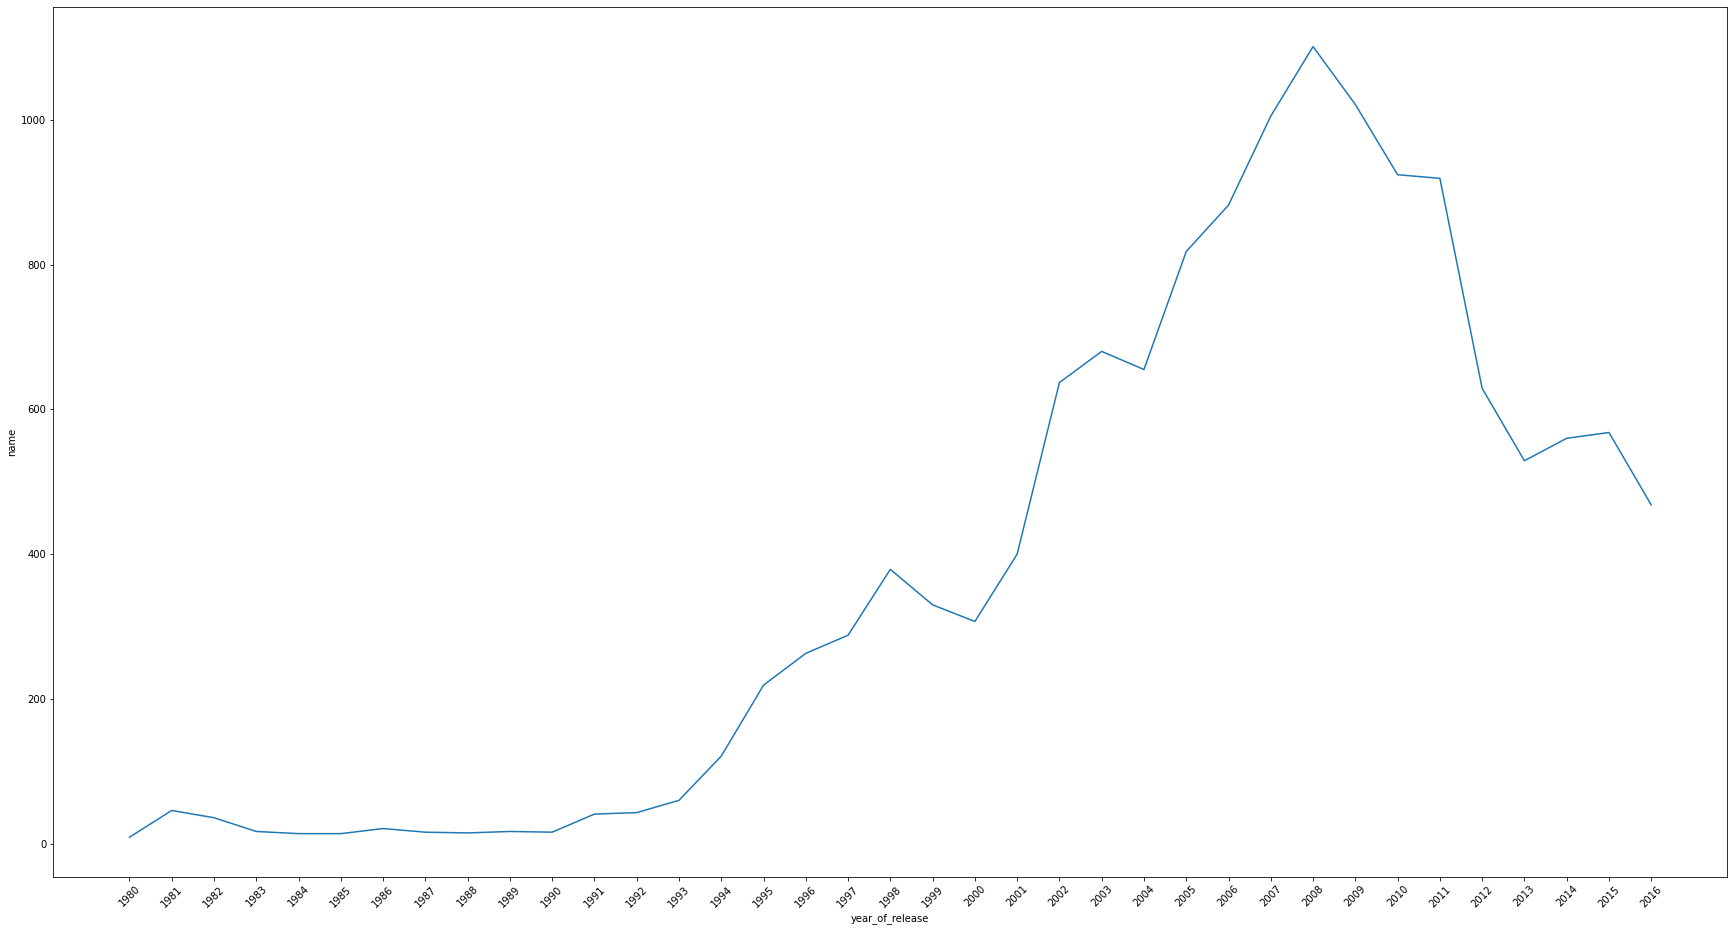

In [22]:
ax = sns.lineplot(data=df[df.year_of_release!=0].groupby('year_of_release')['name'].count())
ax.set(xticks=df[df.year_of_release!=0].year_of_release.unique())
plt.gcf().set_size_inches(30, 16)
plt.xticks(rotation=45)
plt.show()


#### Вывод:
  Пик количества выпускаемых игр приходился на период с 2006 по 2011 год.

In [23]:
# подсчитаем продажи по платформам с помощью группировки, и сохраним в переменную
sales_platform= df.groupby('platform')['sales'].sum().sort_values(ascending=False)
sales_platform

platform
PS2     1191.93
X360     958.84
PS3      929.40
Wii      807.14
PS       717.24
DS       657.00
PS4      314.00
PSP      277.12
GBA      265.92
PC       256.01
GB       255.46
3DS      254.15
NES      251.05
XB       241.41
N64      218.68
SNES     200.04
GC       187.56
XOne     158.77
2600      96.98
WiiU      81.79
PSV       53.76
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sales, dtype: float64

#### Вывод:
  Выделяется шестерка лидирующих платформ по продажам: PS2, X360, PS3, Wii, DS, PS.

In [24]:
# создаем таблицу
sales_platform = pd.DataFrame({'sales_platform':sales_platform}).reset_index()
sales_platform

,platform,sales_platform
0,PS2,1191.93
1,X360,958.84
2,PS3,929.40
3,Wii,807.14
4,PS,717.24
5,DS,657.00
6,PS4,314.00
7,PSP,277.12
8,GBA,265.92
9,PC,256.01


In [25]:
# присоединяем полученную таблицу к основной
df = df.merge(sales_platform, on='platform', how='left')
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,isna_critic,sales,sales_platform
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,75.0,82.54,807.14
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,10000.0,неизвестно,69.0,40.24,251.05
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,69.0,35.52,807.14
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,75.0,32.77,807.14
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,10000.0,неизвестно,74.0,31.38,255.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14286,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,10000.0,неизвестно,68.0,0.01,929.40
14287,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,75.0,10000.0,неизвестно,75.0,0.01,958.84
14288,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.0,10000.0,неизвестно,66.0,0.01,53.76
14289,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,69.0,10000.0,неизвестно,69.0,0.01,265.92


In [26]:
# отфильтруем таблицу, оставив более прибыльные платформы и сохранив изменения в новый датафрейм
filtr_df = df[(df.sales_platform>150)&(df.year_of_release>0)]
filtr_df 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,isna_critic,sales,sales_platform
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,75.0,82.54,807.14
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,10000.0,неизвестно,69.0,40.24,251.05
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,69.0,35.52,807.14
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,75.0,32.77,807.14
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,10000.0,неизвестно,74.0,31.38,255.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14284,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,69.0,10000.0,неизвестно,69.0,0.01,265.92
14285,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,69.0,10000.0,неизвестно,69.0,0.00,1191.93
14286,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,10000.0,неизвестно,68.0,0.01,929.40
14287,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,75.0,10000.0,неизвестно,75.0,0.01,958.84


#### Вывод:
  Осталось 18 лидирующих по продажам платформ.

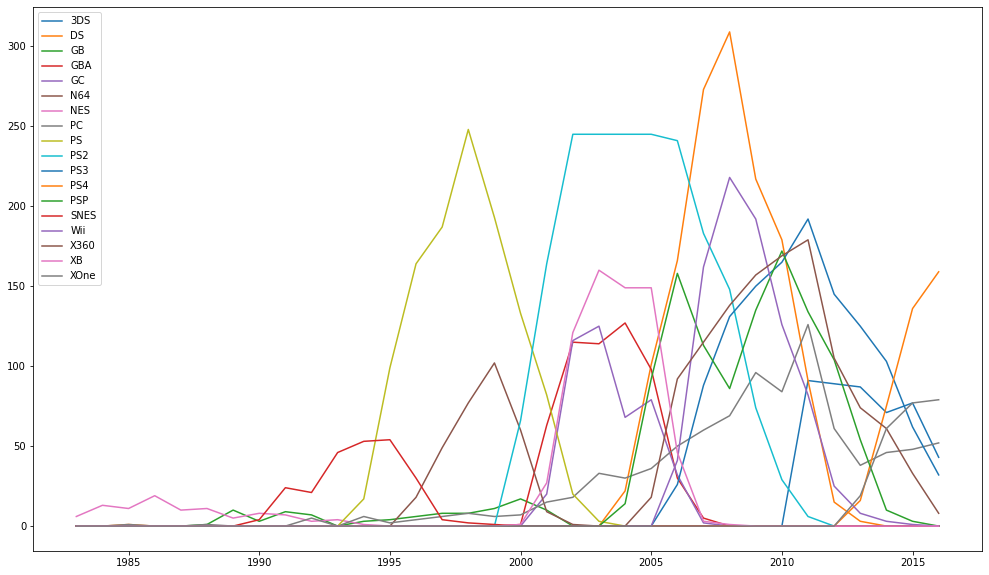

In [27]:
# построим график, отображающий продажи по платформам и по годам
fig = plt.figure(figsize=(17,10))
ax = fig.add_subplot(111)
data_for_plot= filtr_df.pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count').fillna(0)
ax.plot(data_for_plot)
ax.legend(data_for_plot)
plt.show()

In [28]:
# узнаем год когда платформы вышли с рынка
max_df = filtr_df.groupby('platform')['year_of_release'].max()
max_df


platform
3DS     2016
DS      2013
GB      2001
GBA     2007
GC      2007
N64     2002
NES     1994
PC      2016
PS      2003
PS2     2011
PS3     2016
PS4     2016
PSP     2015
SNES    1999
Wii     2015
X360    2016
XB      2008
XOne    2016
Name: year_of_release, dtype: int64

In [29]:
# создаем таблицу
max_df = pd.DataFrame({'max_df': max_df}).reset_index()
max_df

,platform,max_df
0,3DS,2016
1,DS,2013
2,GB,2001
3,GBA,2007
4,GC,2007
5,N64,2002
6,NES,1994
7,PC,2016
8,PS,2003
9,PS2,2011


In [30]:
# узнаем год создания платформ
min_df = filtr_df.groupby('platform')['year_of_release'].min()
min_df

platform
3DS     2011
DS      1985
GB      1988
GBA     2000
GC      2001
N64     1996
NES     1983
PC      1985
PS      1994
PS2     2000
PS3     2006
PS4     2013
PSP     2004
SNES    1990
Wii     2006
X360    2005
XB      2000
XOne    2013
Name: year_of_release, dtype: int64

In [31]:
# создаем таблицу
min_df = pd.DataFrame({'min_df': min_df}).reset_index()
min_df

,platform,min_df
0,3DS,2011
1,DS,1985
2,GB,1988
3,GBA,2000
4,GC,2001
5,N64,1996
6,NES,1983
7,PC,1985
8,PS,1994
9,PS2,2000


In [32]:
# объединим полученные таблицы
min_max = min_df.merge(max_df, on='platform',how='left')
min_max

,platform,min_df,max_df
0,3DS,2011,2016
1,DS,1985,2013
2,GB,1988,2001
3,GBA,2000,2007
4,GC,2001,2007
5,N64,1996,2002
6,NES,1983,1994
7,PC,1985,2016
8,PS,1994,2003
9,PS2,2000,2011


In [33]:
# подсчитаем сколько лет существовала каждая платформа
min_max['duration'] =  min_max['max_df'] - min_max['min_df']
min_max

,platform,min_df,max_df,duration
0,3DS,2011,2016,5
1,DS,1985,2013,28
2,GB,1988,2001,13
3,GBA,2000,2007,7
4,GC,2001,2007,6
5,N64,1996,2002,6
6,NES,1983,1994,11
7,PC,1985,2016,31
8,PS,1994,2003,9
9,PS2,2000,2011,11


In [34]:
# узнаем среднюю "продолжительность жизни" платформ
min_max['duration'].mean()

10.61111111111111

In [35]:
# отфильтруем таблицу, оставив данные с 2013 года. Оставленные платформы существуют и сейчас(2016 год).
filtr_df = filtr_df[(filtr_df.year_of_release>2013)]
filtr_df 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,isna_critic,sales,sales_platform
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,10000.0,неизвестно,73.0,14.63,314.00
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,68.0,12.62,314.00
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,74.0,10000.0,неизвестно,74.0,11.68,254.15
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,75.0,8.58,314.00
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,73.0,10000.0,неизвестно,73.0,7.98,314.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14256,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,68.0,10000.0,неизвестно,68.0,0.01,929.40
14259,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,68.0,10000.0,неизвестно,68.0,0.01,254.15
14272,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,10000.0,неизвестно,68.0,0.01,929.40
14273,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,68.0,0.01,256.01


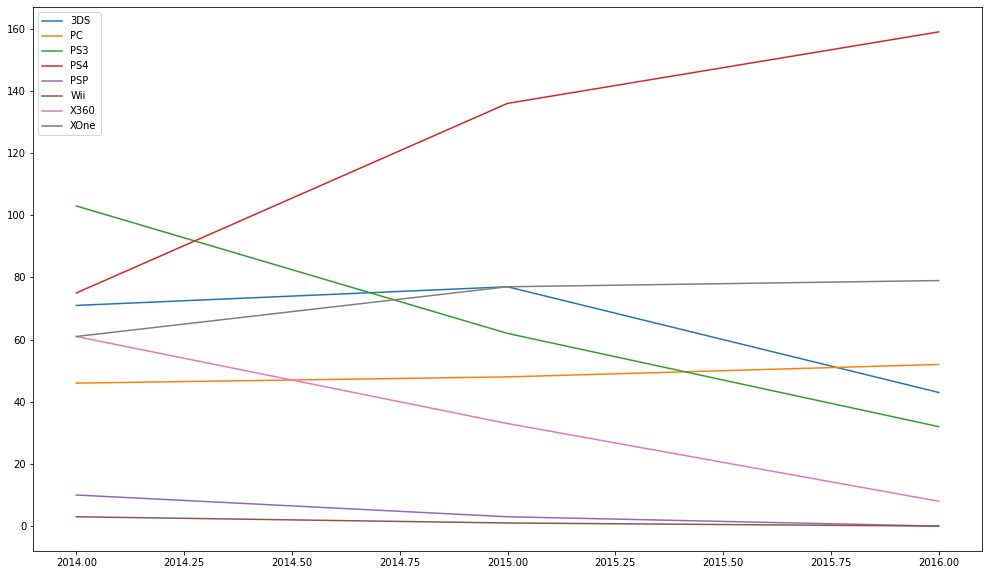

In [36]:
# отобразим на графике количество выпущенных игр на платформах с 2014 года
fig = plt.figure(figsize=(17,10))
ax = fig.add_subplot(111)
data_for_plot= filtr_df.pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count').fillna(0)
ax.plot(data_for_plot)
ax.legend(data_for_plot)
plt.show()

In [37]:
# узнаем продажи игр по платформам после 2013 года
sales_platform_2013 = filtr_df.groupby('platform')['sales'].sum().sort_values(ascending=False)
sales_platform_2013

platform
PS4     288.01
XOne    139.81
3DS      85.38
PS3      66.86
X360     46.86
PC       26.96
Wii       2.76
PSP       0.36
Name: sales, dtype: float64

#### Вывод:
  Четко выделяется шестерка лидирующих платформ по объему продаж. С ними будем дальше работать.

In [38]:
# создаем таблицу
sales_platform_2013 = pd.DataFrame({'sales_platform_2013':sales_platform_2013}).reset_index()
sales_platform_2013

,platform,sales_platform_2013
0,PS4,288.01
1,XOne,139.81
2,3DS,85.38
3,PS3,66.86
4,X360,46.86
5,PC,26.96
6,Wii,2.76
7,PSP,0.36


In [39]:
# присоединим полученную таблицу к таблице filtr_df
filtr_df = filtr_df.merge(sales_platform_2013, on='platform', how='left')
filtr_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,isna_critic,sales,sales_platform,sales_platform_2013
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,10000.0,неизвестно,73.0,14.63,314.00,288.01
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,68.0,12.62,314.00,288.01
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,74.0,10000.0,неизвестно,74.0,11.68,254.15,85.38
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,75.0,8.58,314.00,288.01
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,73.0,10000.0,неизвестно,73.0,7.98,314.00,288.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,68.0,10000.0,неизвестно,68.0,0.01,929.40,66.86
1236,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,68.0,10000.0,неизвестно,68.0,0.01,254.15,85.38
1237,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,10000.0,неизвестно,68.0,0.01,929.40,66.86
1238,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,68.0,0.01,256.01,26.96


In [40]:
# отфильтруем таблицу, оставив самые успешные платформы
filtr_df = filtr_df[filtr_df.sales_platform_2013>20]
filtr_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,isna_critic,sales,sales_platform,sales_platform_2013
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,10000.0,неизвестно,73.0,14.63,314.00,288.01
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,68.0,12.62,314.00,288.01
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,74.0,10000.0,неизвестно,74.0,11.68,254.15,85.38
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,75.0,8.58,314.00,288.01
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,73.0,10000.0,неизвестно,73.0,7.98,314.00,288.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,68.0,10000.0,неизвестно,68.0,0.01,929.40,66.86
1236,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,68.0,10000.0,неизвестно,68.0,0.01,254.15,85.38
1237,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,10000.0,неизвестно,68.0,0.01,929.40,66.86
1238,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,68.0,0.01,256.01,26.96


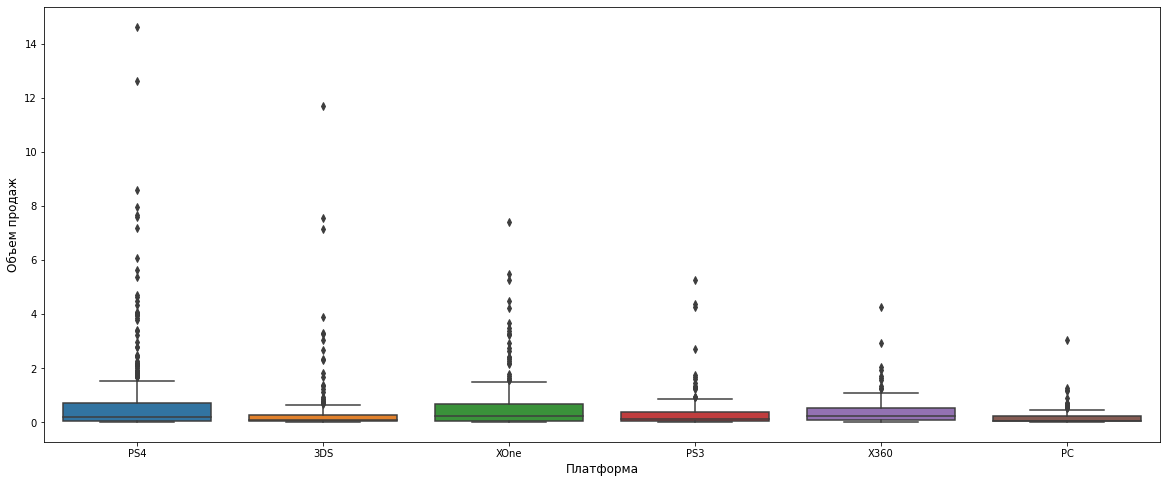

In [41]:
# построим гистограмму размаха для каждой из платформ
plt.figure(figsize=(20,8))
sns.boxplot(data=filtr_df, x='platform', y='sales')
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Объем продаж', fontsize=12)
plt.show()

#### Вывод:
  На всех графиках максимальная сумма продаж не превышает 2млн(больше всех у платформы PS4, меньше всех у платформы PC). Медиана у всех смещена влево. Все имеют выбросы, которые означают аномальные значения.

In [42]:
#исследуем самую успешную платформу 'PS4'
ps4 = filtr_df[filtr_df.platform=='PS4']
ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,isna_critic,sales,sales_platform,sales_platform_2013
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,10000.0,неизвестно,73.0,14.63,314.0,288.01
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,68.0,12.62,314.0,288.01
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,75.0,8.58,314.0,288.01
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,73.0,10000.0,неизвестно,73.0,7.98,314.0,288.01
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,73.0,7.66,314.0,288.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,неизвестно,66.0,0.01,314.0,288.01
1207,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,66.0,10000.0,неизвестно,66.0,0.01,314.0,288.01
1212,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,74.0,0.01,314.0,288.01
1213,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,68.0,0.01,314.0,288.01


<AxesSubplot:xlabel='sales', ylabel='critic_score'>

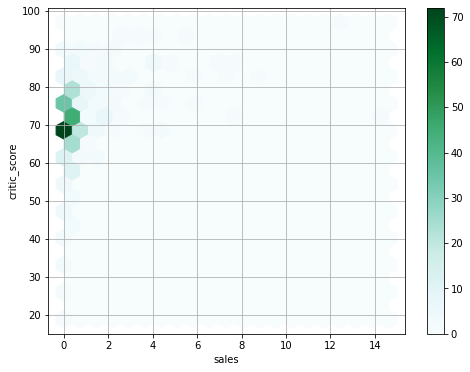

In [43]:
# строим гистограмму рассеивания зависимости продаж от оценок
ps4.plot(x='sales', y='critic_score', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

In [44]:
# сосчитаем корреляцию
ps4['sales'].corr(ps4['critic_score'])

0.3450177483830806

<AxesSubplot:xlabel='sales', ylabel='user_score'>

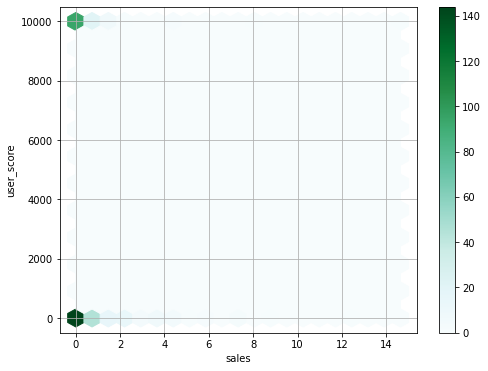

In [45]:
# строим гистограмму рассеивания зависимости продаж от оценок
ps4.plot(x='sales', y='user_score', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

In [46]:
# сосчитаем корреляцию
ps4['sales'].corr(ps4['user_score'])

-0.11019600979079004

#### Вывод:
  В данном случае зависимость продаж от оценок слабая.

In [47]:
# исследуем платформу '3DS'
df_3DS = filtr_df[filtr_df.platform=='3DS']
df_3DS

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,isna_critic,sales,sales_platform,sales_platform_2013
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,74.0,10000.0,неизвестно,74.0,11.68,254.15,85.38
7,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,72.0,10000.0,неизвестно,72.0,7.55,254.15,85.38
10,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,74.0,10000.0,неизвестно,74.0,7.14,254.15,85.38
32,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,0.68,0.48,2.62,0.11,86.0,8.7,T,74.0,3.89,254.15,85.38
40,Monster Hunter X,3DS,2015,Action,0.27,0.21,2.79,0.05,68.0,10000.0,неизвестно,68.0,3.32,254.15,85.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,"Horse Life 4: My Horse, My Friend, My Champion",3DS,2015,Action,0.00,0.01,0.00,0.00,68.0,10000.0,неизвестно,68.0,0.01,254.15,85.38
1225,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015,Misc,0.00,0.00,0.01,0.00,69.0,10000.0,неизвестно,69.0,0.01,254.15,85.38
1226,Kiniro no Corda 3,3DS,2015,Adventure,0.00,0.00,0.01,0.00,66.0,10000.0,неизвестно,66.0,0.01,254.15,85.38
1234,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,68.0,10000.0,неизвестно,68.0,0.01,254.15,85.38


<AxesSubplot:xlabel='sales', ylabel='critic_score'>

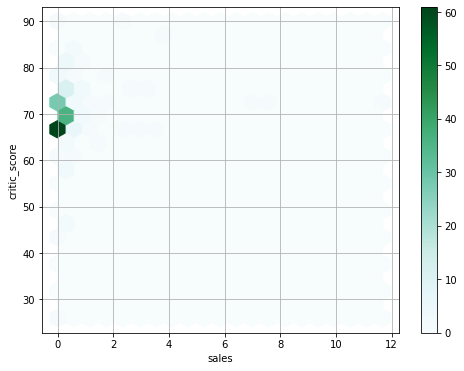

In [48]:
# строим гистограмму рассеивания зависимости продаж от оценок критиков
df_3DS.plot(x='sales', y='critic_score', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

In [49]:
# сосчитаем корреляцию
df_3DS['sales'].corr(df_3DS['critic_score'])

0.163244954485537

<AxesSubplot:xlabel='sales', ylabel='user_score'>

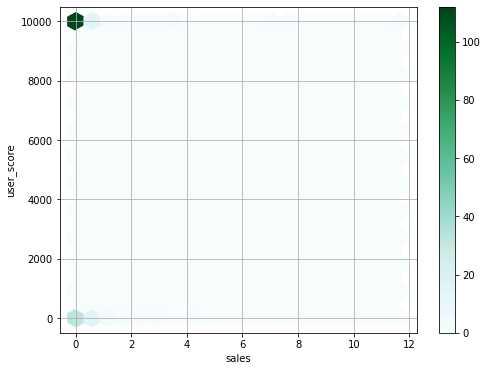

In [50]:
# строим гистограмму рассеивания зависимости продаж от оценок пользователей
df_3DS.plot(x='sales', y='user_score', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

In [51]:
# сосчитаем корреляцию
df_3DS['sales'].corr(df_3DS['user_score'])

-0.0214217149799699

#### Вывод:
 По результатам корреляции зависимость от оценок критиков отсутсвует, но присутствует зависимость от оценок пользователей.

In [52]:
# исследуем платформу 'PS3'
df_PS3 = filtr_df[filtr_df.platform=='PS3']
df_PS3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,isna_critic,sales,sales_platform,sales_platform_2013
16,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,69.0,10000.0,неизвестно,69.0,5.27,929.4,66.86
21,Call of Duty: Advanced Warfare,PS3,2014,Shooter,1.56,1.93,0.19,0.68,73.0,4.8,M,73.0,4.36,929.4,66.86
24,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,75.0,4.5,E,75.0,4.28,929.4,66.86
54,FIFA 16,PS3,2015,Sports,0.41,1.84,0.05,0.40,75.0,3.2,E,75.0,2.70,929.4,66.86
90,Watch Dogs,PS3,2014,Action,0.56,0.81,0.10,0.27,68.0,5.1,M,68.0,1.74,929.4,66.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,Shin Koihime Musou: Otome Taisen * Sangokushi ...,PS3,2014,Adventure,0.00,0.00,0.01,0.00,66.0,10000.0,неизвестно,66.0,0.01,929.4,66.86
1219,Naruto Shippuden: Ultimate Ninja Storm Collection,PS3,2016,Action,0.00,0.01,0.00,0.00,68.0,10000.0,неизвестно,68.0,0.01,929.4,66.86
1235,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,68.0,10000.0,неизвестно,68.0,0.01,929.4,66.86
1237,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,10000.0,неизвестно,68.0,0.01,929.4,66.86


<AxesSubplot:xlabel='sales', ylabel='critic_score'>

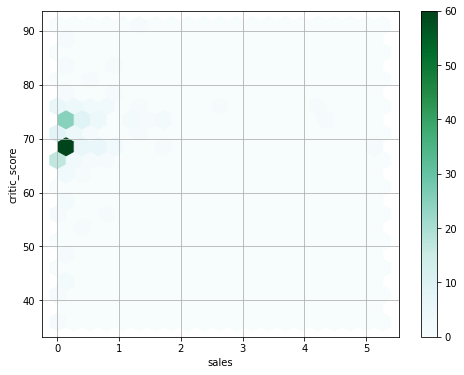

In [53]:
# строим гистограмму рассеивания зависимости продаж от оценок критиков
df_PS3.plot(x='sales', y='critic_score', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

In [54]:
# сосчитаем корреляцию
df_PS3['sales'].corr(df_PS3['critic_score'])

0.17495743119609364

<AxesSubplot:xlabel='sales', ylabel='user_score'>

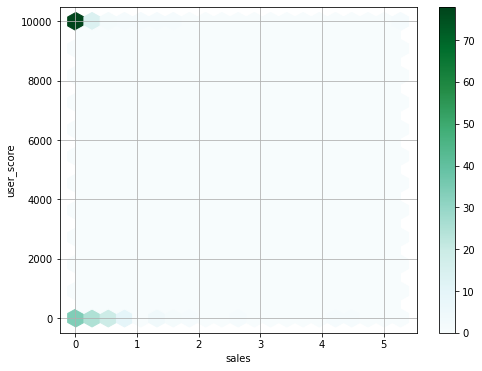

In [55]:
# строим гистограмму рассеивания зависимости продаж от оценок пользователей
df_PS3.plot(x='sales', y='user_score', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

In [56]:
# сосчитаем корреляцию
df_PS3['sales'].corr(df_PS3['user_score'])

-0.2374236636966043

#### Вывод:
  Можно сказать, что зависимость слабая.

In [57]:
# исследуем платформу 'X360'
df_X360 = filtr_df[filtr_df.platform=='X360']
df_X360

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,isna_critic,sales,sales_platform,sales_platform_2013
23,Call of Duty: Advanced Warfare,X360,2014,Shooter,2.77,1.11,0.0,0.40,73.0,4.9,M,73.0,4.28,958.84,46.86
50,FIFA 15,X360,2014,Sports,0.79,1.92,0.0,0.21,75.0,4.2,E,75.0,2.92,958.84,46.86
75,Madden NFL 15,X360,2014,Sports,1.77,0.06,0.0,0.22,75.0,5.5,E,75.0,2.05,958.84,46.86
79,Destiny,X360,2014,Shooter,1.31,0.43,0.0,0.18,73.0,4.7,T,73.0,1.92,958.84,46.86
94,Call of Duty: Black Ops 3,X360,2015,Shooter,1.14,0.40,0.0,0.16,73.0,10000.0,неизвестно,73.0,1.70,958.84,46.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,Rugby League Live 3,X360,2015,Action,0.00,0.02,0.0,0.00,68.0,7.0,E,68.0,0.02,958.84,46.86
1094,Back to the Future: The Game,X360,2015,Adventure,0.02,0.00,0.0,0.00,66.0,7.5,неизвестно,66.0,0.02,958.84,46.86
1117,Kung Fu Panda: Showdown of Legendary Legends,X360,2015,Action,0.00,0.02,0.0,0.00,68.0,6.8,E10+,68.0,0.02,958.84,46.86
1180,Adventure Time: The Secret of the Nameless,X360,2014,Adventure,0.01,0.00,0.0,0.00,66.0,10000.0,неизвестно,66.0,0.01,958.84,46.86


<AxesSubplot:xlabel='sales', ylabel='critic_score'>

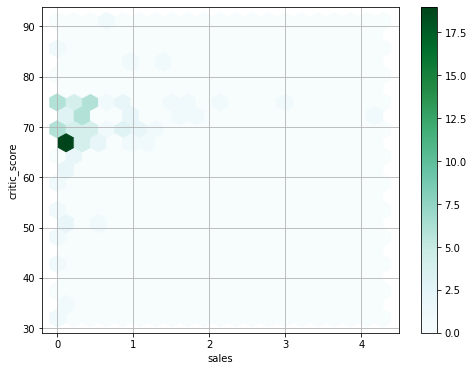

In [58]:
# строим гистограмму рассеивания зависимости продаж от оценок критиков
df_X360.plot(x='sales', y='critic_score', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

In [59]:
# сосчитаем корреляцию
df_X360['sales'].corr(df_X360['critic_score'])

0.2723208233867203

<AxesSubplot:xlabel='sales', ylabel='user_score'>

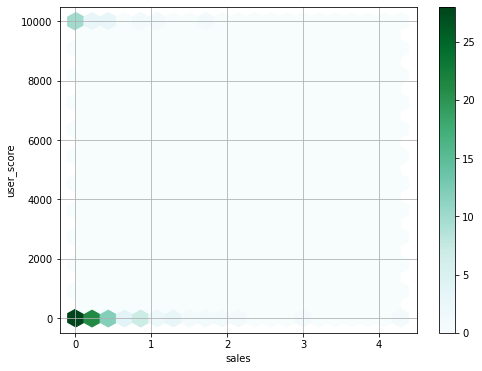

In [60]:
# строим гистограмму рассеивания зависимости продаж от оценок пользователей
df_X360.plot(x='sales', y='user_score', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

In [61]:
# сосчитаем корреляцию
df_X360['sales'].corr(df_X360['user_score'])

-0.10621717638007348

#### Вывод:
 из полученных результатов делаем вывод, что зависимость продаж от оценок отсутствует.

In [62]:
# исследуем платформу 'PC'
df_PC = filtr_df[filtr_df.platform=='PC']
df_PC

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,isna_critic,sales,sales_platform,sales_platform_2013
47,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,70.0,3.05,256.01,26.96
127,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,74.0,1.28,256.01,26.96
139,Farming Simulator 2015,PC,2014,Simulation,0.08,1.04,0.0,0.07,70.0,10000.0,неизвестно,70.0,1.19,256.01,26.96
142,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.0,0.09,96.0,7.9,M,68.0,1.17,256.01,26.96
177,The Elder Scrolls Online,PC,2014,Role-Playing,0.32,0.51,0.0,0.07,71.0,5.7,M,74.0,0.90,256.01,26.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,Ride 2,PC,2016,Racing,0.00,0.01,0.0,0.00,78.0,7.9,E,69.0,0.01,256.01,26.96
1211,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.0,0.00,75.0,1.4,E,75.0,0.01,256.01,26.96
1228,Codename: Panzers Complete Collection,PC,2016,Strategy,0.00,0.01,0.0,0.00,73.0,10000.0,неизвестно,73.0,0.01,256.01,26.96
1230,The Amazing Spider-Man 2 (2014),PC,2014,Action,0.00,0.01,0.0,0.00,68.0,10000.0,неизвестно,68.0,0.01,256.01,26.96


<AxesSubplot:xlabel='sales', ylabel='critic_score'>

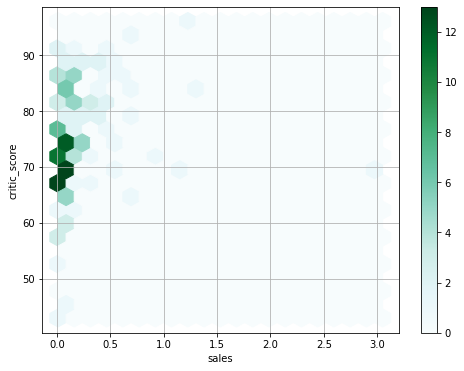

In [63]:
# строим гистограмму рассеивания зависимости продаж от оценок критиков
df_PC.plot(x='sales', y='critic_score', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

In [64]:
# сосчитаем корреляцию
df_PC['sales'].corr(df_PC['critic_score'])

0.1965868594610846

<AxesSubplot:xlabel='sales', ylabel='user_score'>

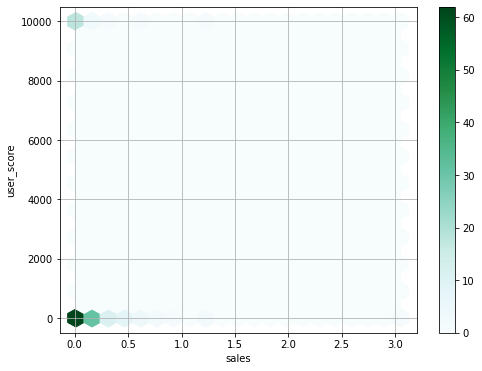

In [65]:
# строим гистограмму рассеивания зависимости продаж от оценок пользователей
df_PC.plot(x='sales', y='user_score', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

In [66]:
# сосчитаем корреляцию
df_PC['sales'].corr(df_PC['user_score'])

-0.08628839162118615

#### Вывод:
  Нет зависимости объема продаж от оценок критиков, но присутствует зависимость от оценки пользователей.

In [67]:
# исследуем платформу 'XOne'
df_XOne = filtr_df[filtr_df.platform=='XOne']
df_XOne

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,isna_critic,sales,sales_platform,sales_platform_2013
8,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,73.0,10000.0,неизвестно,73.0,7.39,158.77,139.81
13,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,68.0,5.47,158.77,139.81
15,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,73.0,5.26,158.77,139.81
19,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,73.0,4.49,158.77,139.81
25,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,74.0,4.22,158.77,139.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,68.0,0.01,158.77,139.81
1229,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,69.0,0.01,158.77,139.81
1231,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,75.0,6.6,E,75.0,0.01,158.77,139.81
1232,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,68.0,10000.0,неизвестно,68.0,0.01,158.77,139.81


<AxesSubplot:xlabel='sales', ylabel='critic_score'>

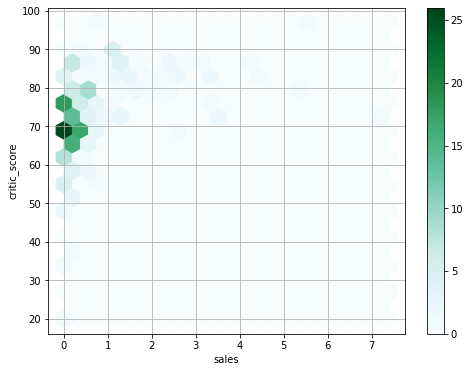

In [68]:
# строим гистограмму рассеивания зависимости продаж от оценок критиков
df_XOne.plot(x='sales', y='critic_score', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

In [69]:
# сосчитаем корреляцию
df_XOne['sales'].corr(df_XOne['critic_score'])

0.3888838036128578

<AxesSubplot:xlabel='sales', ylabel='user_score'>

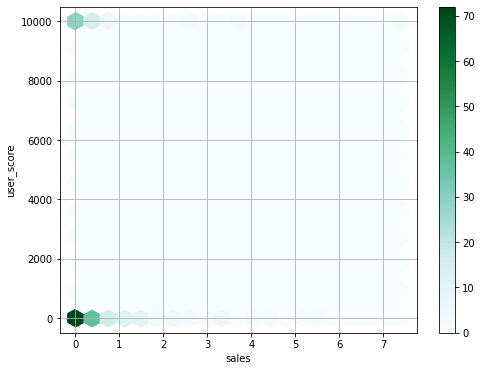

In [70]:
# строим гистограмму рассеивания зависимости продаж от оценок пользователей
df_XOne.plot(x='sales', y='user_score', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

In [71]:
# сосчитаем корреляцию
df_XOne['sales'].corr(df_XOne['user_score'])

-0.0958789298475541

#### Вывод:
 Также не прослеживается зависимость продаж от оценок критиков, но можно говорить о присутствии зависимости от оценок пользователей.

In [72]:
#посмотрим какие жанры лидирубт по количеству игр
filtr_df.groupby('genre')['name'].count()

genre
Action          430
Adventure        96
Fighting         49
Misc             69
Platform         24
Puzzle            6
Racing           62
Role-Playing    158
Shooter         120
Simulation       37
Sports          139
Strategy         33
Name: name, dtype: int64

In [73]:
# проверим какие жанры приносят больший доход
filtr_df.groupby('genre')['sales'].sum().sort_values(ascending=False)


genre
Action          178.18
Shooter         165.27
Sports          106.47
Role-Playing     93.82
Misc             26.03
Fighting         21.57
Racing           20.08
Adventure        14.20
Simulation       12.87
Platform         10.79
Strategy          3.78
Puzzle            0.82
Name: sales, dtype: float64

###  Вывод:
Абсолютным лидером по количеству игр является жанр "Action". В тройке лидеров по доходу: на первом месте "Action", на втором "Shooter", на третьем "Sports".

### Вывод:
 На данном шаге мы выявили актуальный период(с 2013 года) и площадки-лидеры с которыми будем дальше работать. Выяснили, что нет зависимости объема продаж от оценок. Определили популярные жанры.
  

### Шаг 4

Сейчас нам предстоит составить портрет пользователя из каждого региона(Северная Америка, Япония, Европа). Начнем с Северной Америки.

In [74]:
# Подсчитаем средние продажи в каждом жанре и выявим лидеров.
genre_na = filtr_df.groupby('genre')['na_sales'].mean().sort_values(ascending=False)
genre_na

genre
Shooter         0.640500
Sports          0.326691
Role-Playing    0.203924
Fighting        0.188163
Misc            0.158696
Platform        0.158333
Action          0.152674
Racing          0.088710
Simulation      0.069730
Adventure       0.052083
Strategy        0.029697
Puzzle          0.010000
Name: na_sales, dtype: float64

In [75]:
genre_na = pd.DataFrame({'genre_na':genre_na}).reset_index()
genre_na

,genre,genre_na
0,Shooter,0.640500
1,Sports,0.326691
2,Role-Playing,0.203924
3,Fighting,0.188163
4,Misc,0.158696
5,Platform,0.158333
6,Action,0.152674
7,Racing,0.088710
8,Simulation,0.069730
9,Adventure,0.052083


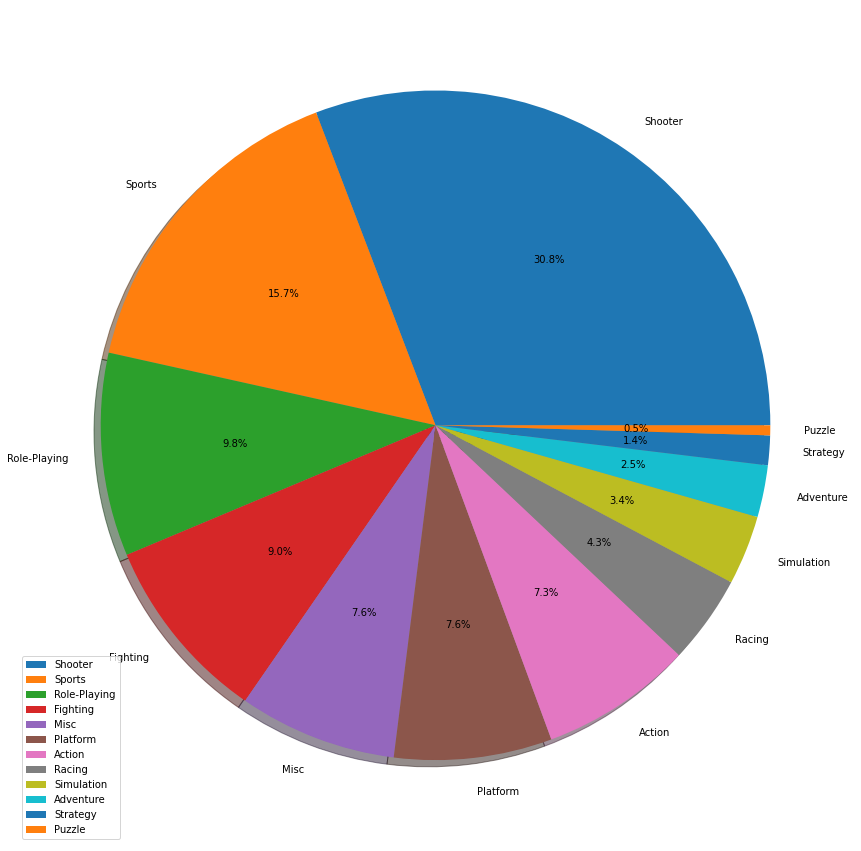

In [76]:
# Построим диаграмму, отображающую доли продаж каждого жанра
fig1, ax1 = plt.subplots(figsize=(15, 20))
ax1.pie('genre_na', labels='genre', autopct='%1.1f%%', shadow=True, startangle=0, data=genre_na)
plt.legend()
plt.show()

In [77]:
# рассчитаем средние продажи по каждой платформе и определим лидеров в данном регионе
platform_na = filtr_df.groupby('platform')['na_sales'].mean().sort_values(ascending=False)
platform_na

platform
XOne    0.372903
X360    0.270000
PS4     0.266189
3DS     0.116387
PS3     0.110761
PC      0.049521
Name: na_sales, dtype: float64

In [78]:
platform_na = pd.DataFrame({'platform_na': platform_na}).reset_index()
platform_na

,platform,platform_na
0,XOne,0.372903
1,X360,0.270000
2,PS4,0.266189
3,3DS,0.116387
4,PS3,0.110761
5,PC,0.049521


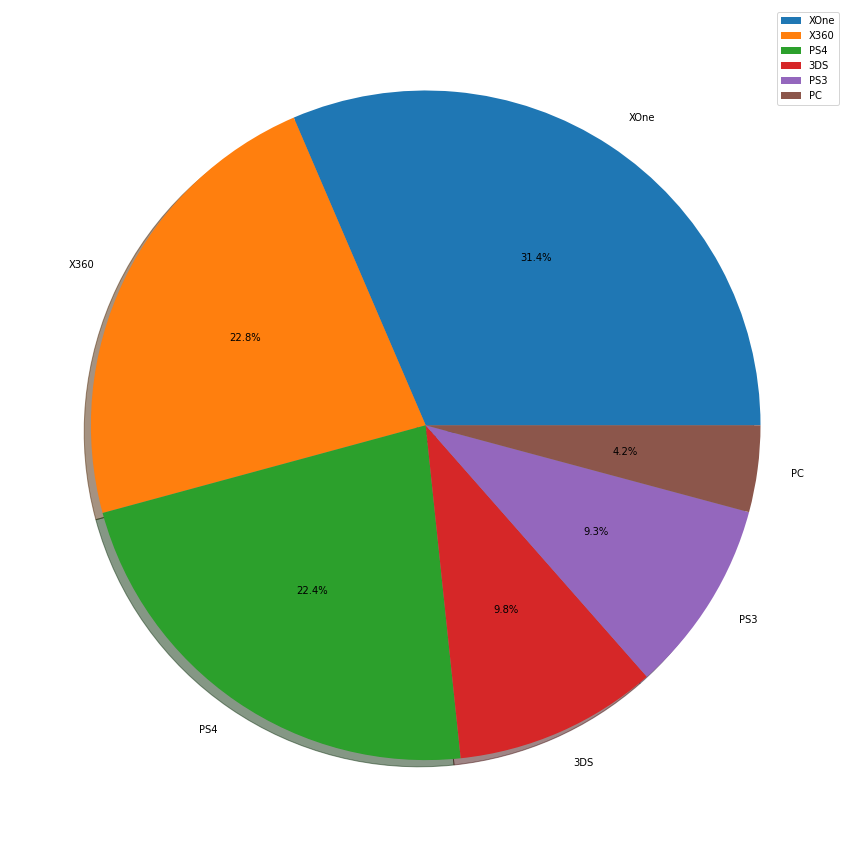

In [79]:
fig1, ax1 = plt.subplots(figsize=(15, 20))
ax1.pie('platform_na', labels='platform', autopct='%1.1f%%', shadow=True, startangle=0, data=platform_na)
plt.legend()
plt.show()

In [80]:
# проверим игры какой возрастной категории приносят больший доход в Северной Америке
rating_na = filtr_df.groupby('rating')['na_sales'].mean().sort_values(ascending=False)
rating_na

rating
M             0.398075
E             0.251976
E10+          0.199836
T             0.175749
неизвестно    0.123463
Name: na_sales, dtype: float64

<AxesSubplot:xlabel='rating'>

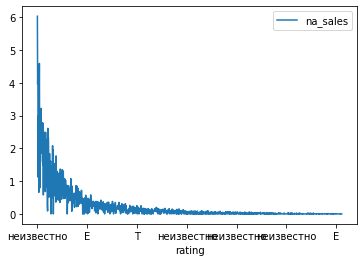

In [81]:
# Построим график
filtr_df.plot(x='rating', y='na_sales')

In [82]:
# Теперь начнем изучение Европейского региона. Узнаем самые прибыльные жанры.
genre_eu = filtr_df.groupby('genre')['eu_sales'].mean().sort_values(ascending=False)
genre_eu

genre
Shooter         0.533333
Sports          0.319784
Simulation      0.194595
Racing          0.191452
Platform        0.183750
Role-Playing    0.172152
Action          0.158605
Misc            0.132319
Fighting        0.106939
Adventure       0.060729
Strategy        0.054242
Puzzle          0.015000
Name: eu_sales, dtype: float64

In [83]:
genre_eu = pd.DataFrame({'genre_eu':genre_eu}).reset_index()
genre_eu

,genre,genre_eu
0,Shooter,0.533333
1,Sports,0.319784
2,Simulation,0.194595
3,Racing,0.191452
4,Platform,0.183750
5,Role-Playing,0.172152
6,Action,0.158605
7,Misc,0.132319
8,Fighting,0.106939
9,Adventure,0.060729


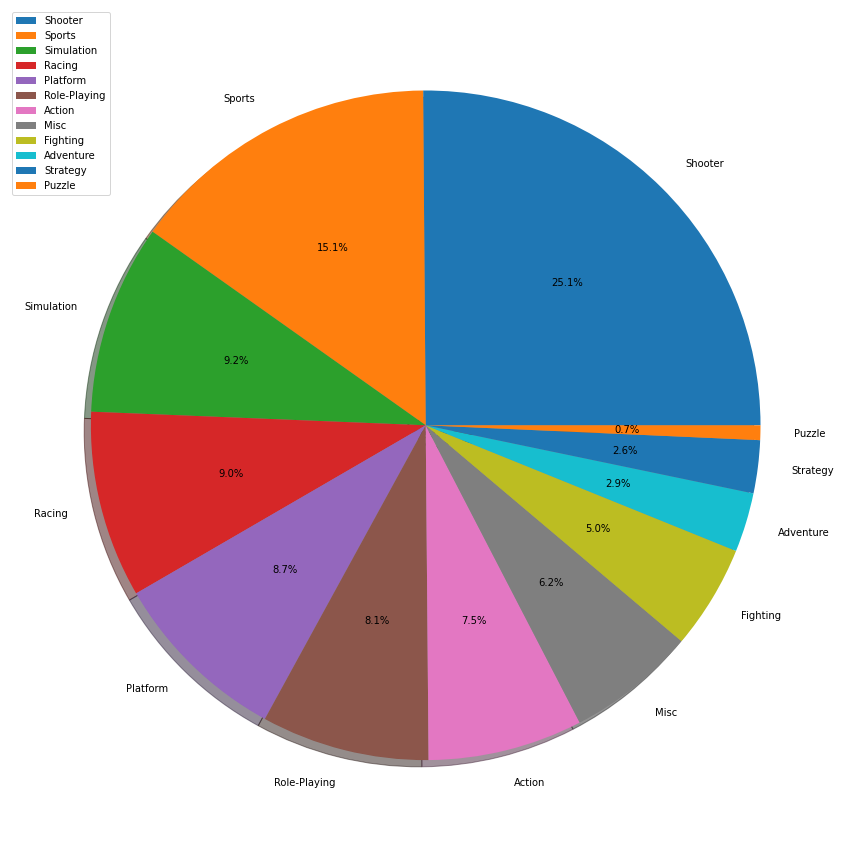

In [84]:
fig1, ax1 = plt.subplots(figsize=(15, 20))
ax1.pie('genre_eu', labels='genre', autopct='%1.1f%%', shadow=True, startangle=0, data=genre_eu)
plt.legend()
plt.show()

In [85]:
#Получим рейтинг продаж по платформам
platform_eu = filtr_df.groupby('platform')['eu_sales'].mean().sort_values(ascending=False)
platform_eu

platform
PS4     0.351459
XOne    0.212396
X360    0.147157
PS3     0.126751
PC      0.122466
3DS     0.080733
Name: eu_sales, dtype: float64

In [86]:
platform_eu = pd.DataFrame({'platform_eu': platform_eu}).reset_index()
platform_eu

,platform,platform_eu
0,PS4,0.351459
1,XOne,0.212396
2,X360,0.147157
3,PS3,0.126751
4,PC,0.122466
5,3DS,0.080733


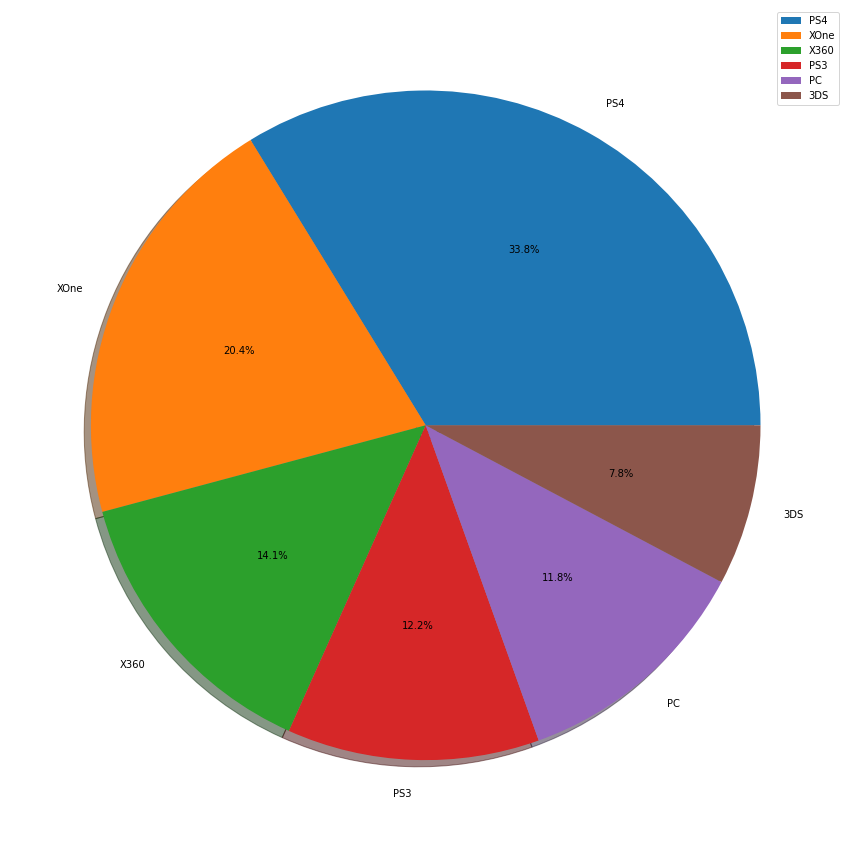

In [87]:
fig1, ax1 = plt.subplots(figsize=(15, 20))
ax1.pie('platform_eu', labels='platform', autopct='%1.1f%%', shadow=True, startangle=0, data=platform_eu)
plt.legend()
plt.show()

In [88]:
# Получим рейтинг игр наиболее популярных возрастных категорий
rating_eu = filtr_df.groupby('rating')['eu_sales'].mean().sort_values(ascending=False)
rating_eu

rating
M             0.386946
E             0.306168
T             0.155266
E10+          0.146639
неизвестно    0.114283
Name: eu_sales, dtype: float64

<AxesSubplot:xlabel='rating'>

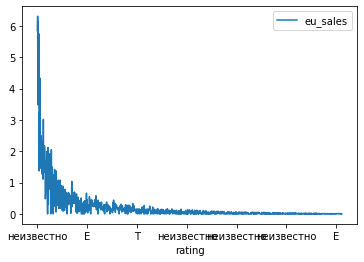

In [89]:
# Построим график
filtr_df.plot(x='rating', y='eu_sales')

In [90]:
# Получим портрет пользователя из Японии. Вычислим наиболее доходные жанры игр
genre_jp = filtr_df.groupby('genre')['jp_sales'].mean().sort_values(ascending=False)
genre_jp

genre
Role-Playing    0.165886
Puzzle          0.110000
Fighting        0.100000
Simulation      0.059730
Platform        0.055000
Action          0.054488
Misc            0.042029
Shooter         0.027750
Strategy        0.023333
Adventure       0.018438
Sports          0.018273
Racing          0.005806
Name: jp_sales, dtype: float64

In [91]:
genre_jp = pd.DataFrame({'genre_jp':genre_jp}).reset_index()
genre_jp

,genre,genre_jp
0,Role-Playing,0.165886
1,Puzzle,0.110000
2,Fighting,0.100000
3,Simulation,0.059730
4,Platform,0.055000
5,Action,0.054488
6,Misc,0.042029
7,Shooter,0.027750
8,Strategy,0.023333
9,Adventure,0.018438


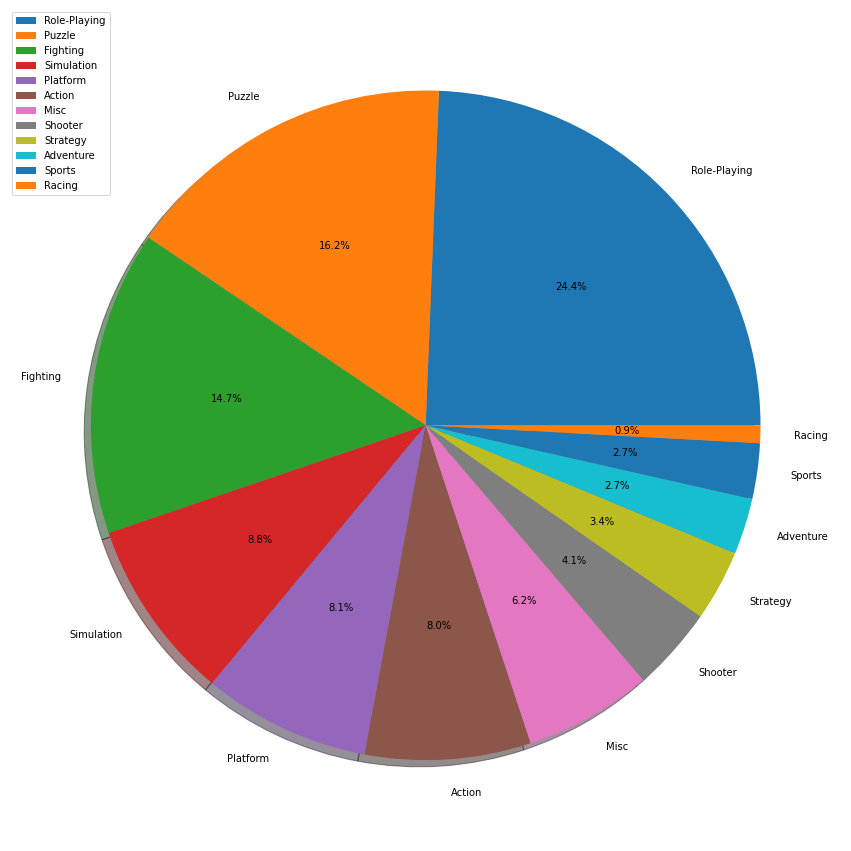

In [92]:
fig1, ax1 = plt.subplots(figsize=(15, 20))
ax1.pie('genre_jp', labels='genre', autopct='%1.1f%%', shadow=True, startangle=0, data=genre_jp, normalize=True)
plt.legend()
plt.show()

In [93]:
# Рейтинг продаж по платформам
platform_jp = filtr_df.groupby('platform')['jp_sales'].mean().sort_values(ascending=False)
platform_jp

platform
3DS     0.231047
PS3     0.055076
PS4     0.040595
XOne    0.001475
X360    0.000784
PC      0.000000
Name: jp_sales, dtype: float64

In [94]:
platform_jp = pd.DataFrame({'platform_jp': platform_jp}).reset_index()
platform_jp

,platform,platform_jp
0,3DS,0.231047
1,PS3,0.055076
2,PS4,0.040595
3,XOne,0.001475
4,X360,0.000784
5,PC,0.000000


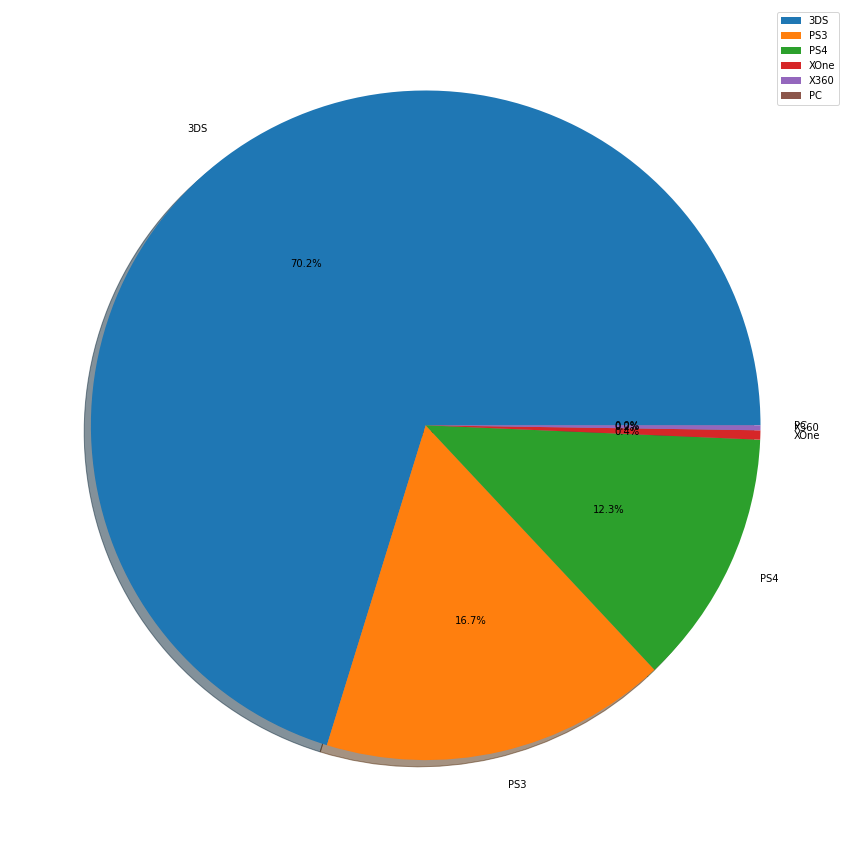

In [95]:
fig1, ax1 = plt.subplots(figsize=(15, 20))
ax1.pie('platform_jp', labels='platform', autopct='%1.1f%%', shadow=True, startangle=0,  data=platform_jp, normalize=True)
plt.legend()
plt.show()

In [96]:
rating_jp = filtr_df.groupby('rating')['jp_sales'].mean().sort_values(ascending=False)
rating_jp

rating
неизвестно    0.093545
T             0.048357
E             0.032754
M             0.029414
E10+          0.018361
Name: jp_sales, dtype: float64

<AxesSubplot:xlabel='rating'>

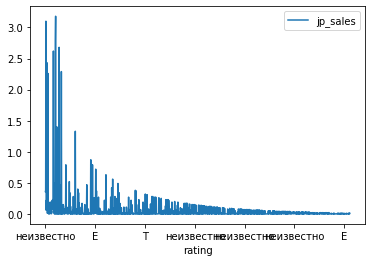

In [97]:
# Построим график
filtr_df.plot(x='rating', y='jp_sales')

### Вывод:
  На данном этапе мы сравнили покупателей из разных регионов и получили следующие выводы:
  - портреты пользователей из Северной Америки и Европы схожи(популярные жанры: shooter и sports; платформы лидеры: XOne, PS4; популярные игры возрастного рейтинга: M, E)
  - пользователи из Японии отличаются от американских и европейских по всем категориям(популярные жанры: role-playing, fightng; платформы лидирующие по продажам: 3DS, PS3; популярные игры возрастного рейтинга: T, M).

### Шаг 5

 На данном этапе нам нужно проверить две гипотезы. 

H₀: Средние пользовательские рейтинги платформ Xbox One и PC равны.
H₁: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [98]:
alpha = .05

In [99]:
results = st.ttest_ind(filtr_df[filtr_df.platform=='XOne'].user_score.values, 
                       filtr_df[filtr_df.platform=='PC'].user_score.values)
results

Ttest_indResult(statistic=1.7307632388185958, pvalue=0.08434849427145329)

Значение pvalue больше значения альфа, значит гипотезу H₀ не отвергаем: средние пользовательские рейтинги платформ Xbox One и PC равны.

H₀: Средние пользовательские рейтинги жанров Action и Sports равны.
H₁:Средние пользовательские рейтинги жанров Action и Sports разные.

In [100]:
alpha = .05

In [101]:
results = st.ttest_ind(filtr_df[filtr_df.genre=='Action'].user_score.values, 
                       filtr_df[filtr_df.genre=='Sports'].user_score.values)
results

Ttest_indResult(statistic=6.625150745165833, pvalue=8.074976583848794e-11)

Значение pvalue меньше значения альфа, значит гипотезу H₀ отвергаем: средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод:
  Исследовав все данные, мы определили актуальный период(с 2013 года) за который следует брать данные для анализа. 
  Выявили наиболее популярные жанры игр и площадки для их продажи: абсолютным лидером по количеству игр является жанр "Action"; в тройке лидеров жанров по доходу: на первом месте "Action", на втором "Shooter", на третьем "Sports". 
  Не была выявлена зависимость объема продаж от оценок критиков. Оценки пользователей иногда влияют на объем продаж.
  Для каждого региона продаж составили портрет пользователя:
 - портреты пользователей из Северной Америки и Европы схожи(популярные жанры: shooter и sports; платформы лидеры: XOne, PS4; популярные игры возрастного рейтинга: M, E)
 - пользователи из Японии отличаются от американских и европейских по всем категориям(популярные жанры: role-playing, fightng; платформы лидирующие по продажам: 3DS, PS3; популярные игры возрастного рейтинга: T, M).
 
 